# Questão 1

Pela fórmula do potencial, temos que:

$$V(\vec{r}) = \frac{1}{4\pi\epsilon_0} \iint\frac{\rho_s(\vec{r'})}{|\vec{r}-\vec{r'}|}ds'$$

## 1. Apresentação do modelo

O modelo utilizado se baseia na discretização de elementos das placas condutoras para resolver a equação acima. A placa será dividida em $n^2$ quadrados de igual tamanho ($\Delta x \Delta$), sendo $\Delta = L/N$, onde L, é o tamanho da placa.

Cada elemento é identificado por 3 índices i,j e k. i indica a posição no eixo x, j no y e k no z. Dessa forma podemos calcular a posição de cada um dos quadrados através dos seus índices tomando como referência o ponto central:

$$r_{i,j,k} = (x_i, y_j, z_k) = (i \cdot \Delta - \Delta/2, j \cdot \Delta - \Delta/2, k\cdot d)$$

Para i=1,...,N, j=1,...,N e z = 0,1

Podemos redimensionar os índices para que possamos identificar todos os pontos através de um único número:

$$m = i+(j-1)\cdot N +k\cdot N^2$$

Podemos então substuir os limites dos calculos para:

$$r_m = (x_i, y_j, z_k) = (i \cdot \Delta + \Delta/2, j \cdot \Delta + \Delta/2, k\cdot d)$$

Para i=0,...,N-1, j=0,...,N-1 e z = 0,1 e $m = i+(j-1)\cdot N +k\cdot N^2$ .

No nosso modelo usaremos uma aproximação para $\rho_s(\vec{r'})$ :

$$\rho_s(\vec{r}) \approx \sum_{n=1}^{2N²}a_n P_n(\vec{r})$$

Onde $P_n$ são funções de base conhecidas. Nesse modelo usaremos funções de base do tipo pulso de forma que:

$$
P_n(x,y,z) = 
\left\{\begin{matrix}
&1 &se& x_i-\Delta/2<x<x_i+\Delta/2, &
y_j-\Delta/2<y<y_j+\Delta/2\,  &
z=k\cdot d\\ 
&0 & fora
\end{matrix}\right.
$$



## 2. Aplicando o modelo à equação do potencial

Substituindo $\rho_s(\vec{r})$ por $\sum_{n=1}^{2N²}a_n P_n(\vec{r})$:

$$V(z_k) = \frac{1}{4\pi\epsilon_0} \iint_{S'}\frac{\sum_{n=1}^{2N²}a_n P_n(x, y, z)}{|\vec{r_m}-\vec{r'}|}ds'$$

Podemos retirar o somatório de dentro da integral:

$$V(z_k) = \frac{1}{4\pi\epsilon_0} \sum_{n=1}^{2N²} \iint_{S'}\frac{a_n P_n(x, y, z)}{|\vec{r_m}-\vec{r'}|}ds'$$

Como $a_n$ são constantes na integral:

$$V(z_k) = \frac{1}{4\pi\epsilon_0} \sum_{n=1}^{2N²}a_n \iint_{S'}\frac{P_n(x, y, z)}{|\vec{r_m}-\vec{r'}|}ds'$$

Pela definição de $P_n$, podemos substituir na integral:

$$V(z_k) = \frac{1}{4\pi\epsilon_0} \sum_{n=1}^{2N²}a_n \int_{x_i - \Delta/2}^{x_i + \Delta/2}\int_{y_j - \Delta/2}^{y_j + \Delta/2}\frac{1}{|\vec{r_m}-\vec{r'}|}dy'dx'$$

## 3. Organizando em forma matricial

Separamos então a equação em 2 regiões: $a_n$ e $Z_{mn}$, onde:

$$Z_{mn} = \frac{1}{4\pi\epsilon_0}\int_{x_i - \Delta/2}^{x_i + \Delta/2}\int_{y_j - \Delta/2}^{y_j + \Delta/2}\frac{1}{|\vec{r_m}-\vec{r}|}dy'dx'$$

E então escrever a equação de forma matricial:

$$\begin{bmatrix}
 & & \\
 & Z & \\
 & & 
\end{bmatrix}
\begin{bmatrix}
 a_1 \\
 \vdots \\
 a_{2N²}
\end{bmatrix}
=
\begin{bmatrix}
  \\
 V \\
   \\
\end{bmatrix}$$

Onde [V] é composto pela tensão em cada uma das placas:

$$
V(z_k) = 
\left\{\begin{matrix}
&0  & 0\leq m\leq N^2-1\\
&V_0 & N^2\leq m \leq 2N^2-1 
\end{matrix}\right.
$$


## 4. Fórmula para os termos da matriz de impedância:
$$|\vec{r_m}-\vec{r'}| = \sqrt{(x_p - x')² + (y_q - y')² + (z_s - z_k)²}$$

$$Z_{mn} = \frac{1}{4\pi\epsilon_0}\int_{x_i - \Delta/2}^{x_i + \Delta/2}\int_{y_j - \Delta/2}^{y_j + \Delta/2}\frac{1}{\sqrt{(x_p - x')² + (y_q - y')² + (z_s - z_k)²}}dy'dx'$$

Caso m $\neq$ n, podemos aproximar como se toda a carga estivesse contida no centro do quadrado:

$$Z_{mn} \approx \frac{1}{4\pi\epsilon_0}\frac{\Delta²}{\sqrt{(x_p - x')² + (y_q - y')²}}$$

Caso m=m, $z_k=z_s$:

$$Z_{nn} = \frac{1}{4\pi\epsilon_0}\int_{x_i - \Delta/2}^{x_i + \Delta/2}\int_{y_j - \Delta/2}^{y_j + \Delta/2}\frac{1}{\sqrt{(x_p - x')² + (y_q - y')²}}dy'dx'$$

Resolvendo a integral:

$$Z_{nn} = \frac{\Delta}{\pi\epsilon_0}ln(1 + \sqrt{2})$$

## Questão 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#Setando os parâmetros do modelo de acordo com o enunciado

N=5 #numero de elementos
V0=1 #voltagem da placa superior
D=0.001 #distancia entre placas
L=0.1 #tamanho da placa
E0 = 8.854187817*10**-12 #constante de permissividade

DELTA = L/N

In [3]:
v = []

#preenchendo o vetor das voltagens
#v=v0 apenas para a placa de cima, ou seja, para os N^2 ultimos elementos
v=[0 if i<N**2 else V0 for i in range(2*N**2)]


In [4]:
#configurando o vetor de posições
#cada entrada do vetor possui as coordenadas x,y e z do centro de um elemento da placa
r=[]
for k in range(2):
    for i in range(N):
        for j in range(N):
            r.append([j*DELTA+0.5*DELTA,i*DELTA+0.5*DELTA,k*D])

print(r[:10])

[[0.01, 0.01, 0.0], [0.03, 0.01, 0.0], [0.05, 0.01, 0.0], [0.06999999999999999, 0.01, 0.0], [0.09, 0.01, 0.0], [0.01, 0.03, 0.0], [0.03, 0.03, 0.0], [0.05, 0.03, 0.0], [0.06999999999999999, 0.03, 0.0], [0.09, 0.03, 0.0]]


In [5]:
#funcao que calcula os elementos da matriz de impedancia a partir dos indices dos elementos, do vetor de posições e do delta
def impedance(r,delta,i,j):
    if i!=j:
        d = ((r[i][0] - r[j][0])**2 + (r[i][1] - r[j][1])**2 + (r[i][2] - r[j][2])**2)**(0.5)
        return 1/(4 * math.pi * E0) * (delta ** 2)/d

    return delta/(math.pi * E0) * math.log(1 + 2**(0.5))



In [6]:
z=[]

#preenchendo a matriz de impedancia
for i in range(2*N**2):
    z.append([])
    for j in range(2*N**2):
        z[i].append(impedance(r,DELTA,i,j))



In [7]:
#resolvendo o sistema linear para acharmos os coeficientes an
A = np.linalg.solve(z,v)

print(A[:10])

[2.41111024e-10 2.32614554e-10 2.30733538e-10 2.32614554e-10
 2.41111024e-10 2.32614554e-10 2.22639242e-10 2.20457255e-10
 2.22639242e-10 2.32614554e-10]


In [8]:
#funcao para plotar o grafico da densidade de carga em uma placa
def plot_plate(Xs,Ys,Zs,n,title):
    #trocando o formato de array 1d de formato n^2x1 para uma matriz 2d de formato nxn para podermos colocar no grafico de wireframe
    shaped_Xs = np.reshape(Xs,(n,n))
    shaped_Ys = np.reshape(Ys,(n,n))
    shaped_Zs = np.reshape(Zs,(n,n))

    ax = plt.axes(projection='3d')
    ax.plot_wireframe(shaped_Xs, shaped_Ys, shaped_Zs, color='black')
    ax.set_title(title)
    plt.show()

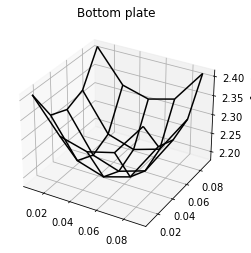

In [9]:
#placa inferior

new_r=np.array(r)

#vetores dos pontos x e y
#apenas a primeira metade dos pontos que correspondem a primeira placa
Xs = new_r[:len(new_r)//2,0]
Ys = new_r[:len(new_r)//2,1]
Zs = np.array(A[:len(A)//2])

plot_plate(Xs,Ys,Zs,N,"Bottom plate")


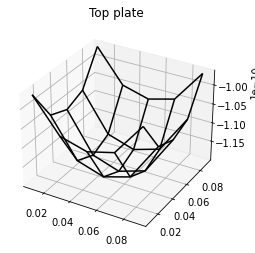

In [10]:
#placa superior

#vetores dos pontos x e y
#apenas a segunda metade dos pontos que correspondem a segunda placa
Xs = new_r[len(new_r)//2:,0]
Ys = new_r[len(new_r)//2:,1]
Zs = np.array(A[len(A)//2:]) 

plot_plate(Xs,Ys,Zs,N,"Top plate")

## Questão 3
### Agora que conseguimos obter um modelo para um número fixo de elementos, criaremos uma função para automatizar o cálculo do mesmo modelo com vários N diferentes e analisar os resultados.


In [11]:
#Criando uma funcao genérica para fazer todos os calculos a partir de um N

def calc_density(v0,d,l,n):
    v = []

    delta = l/n

    #preenchendo o vetor das voltagens
    #v=v0 apenas para a placa de cima, ou seja, para os N^2 ultimos elementos
    v=[0 if i<n**2 else v0 for i in range(2*n**2)]

    #configurando o vetor de posições
    #cada entrada do vetor possui as coordenadas x,y e z do centro de um elemento da placa
    r=[]
    for k in range(2):
        for i in range(n):
            for j in range(n):
                r.append([j*delta+0.5*delta,i*delta+0.5*delta,k*d])

    z=[]

    #preenchendo a matriz de impedancia
    for i in range(2*n**2):
        z.append([])
        for j in range(2*n**2):
            z[i].append(impedance(r,delta,i,j))

    a = np.linalg.solve(z,v)

    #retornando os coeficientes an e o vetor de posições
    return (a,np.array(r))

### Agora podemos analisar vários valores de N diferentes

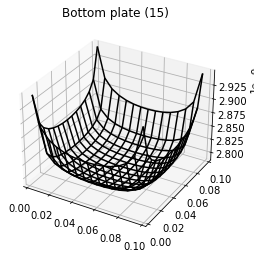

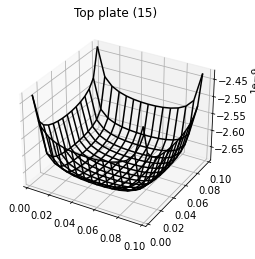

In [12]:
n=15
(an,r) = calc_density(V0,D,L,n)

Xs = r[:len(r)//2,0]
Ys = r[:len(r)//2,1]
Zs = np.array(an[:len(an)//2])

plot_plate(Xs,Ys,Zs,n,"Bottom plate ("+str(n)+")")

Xs = r[len(r)//2:,0]
Ys = r[len(r)//2:,1]
Zs = np.array(an[len(an)//2:]) 

plot_plate(Xs,Ys,Zs,n,"Top plate ("+str(n)+")")


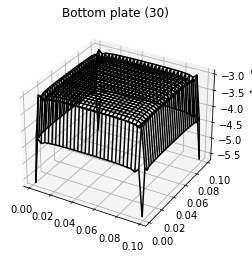

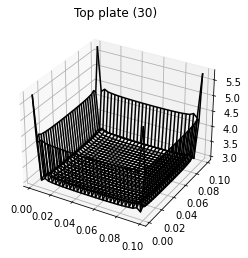

In [13]:
n=30
(an,r) = calc_density(V0,D,L,n)

Xs = r[:len(r)//2,0]
Ys = r[:len(r)//2,1]
Zs = np.array(an[:len(an)//2])

plot_plate(Xs,Ys,Zs,n,"Bottom plate ("+str(n)+")")

Xs = r[len(r)//2:,0]
Ys = r[len(r)//2:,1]
Zs = np.array(an[len(an)//2:]) 

plot_plate(Xs,Ys,Zs,n,"Top plate ("+str(n)+")")


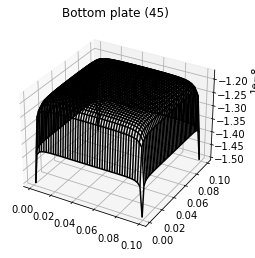

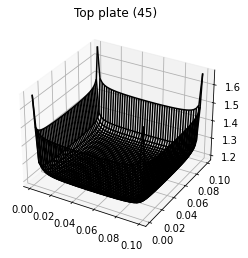

In [14]:
n=45
(an,r) = calc_density(V0,D,L,n)

Xs = r[:len(r)//2,0]
Ys = r[:len(r)//2,1]
Zs = np.array(an[:len(an)//2])

plot_plate(Xs,Ys,Zs,n,"Bottom plate ("+str(n)+")")

Xs = r[len(r)//2:,0]
Ys = r[len(r)//2:,1]
Zs = np.array(an[len(an)//2:]) 

plot_plate(Xs,Ys,Zs,n,"Top plate ("+str(n)+")")


### Podemos ver que a partir de N=30 o modelo converge bem para o resultado esperado, placas com cargas contrárias e grande concentração nas bordas.

## Questão 4
Agora iremos analisar a capacitância calculada a partir dos dados do modelo usando a fórmula $\frac{q}{V}$ e comparar com o resultado analítico da fórmula $\frac{\epsilon_0\cdot A}{d}$.
A carga de um elemento é calculada através da multiplicação da área do elemento pela sua densidade superficial de carga. Para a carga total, são somadas as cargas individuais:
$$Q_{total} = \sum_{i=1}^{n^2} q_i$$
Essa fórmula pode ser reescrita por:
$$Q_{total} = \Delta^2 \cdot \sum_{i=1}^{n^2} a_i$$

In [15]:
#Capacitancia teorica
E0*L**2/D

8.854187817e-11

In [16]:
n=10
(an,r) = calc_density(V0,D,L,n)

q = ((L/n)**2)*an[:len(an)//2].sum()
capacitance = q/V0
print(capacitance)

9.513095216891653e-12


In [17]:
n=20
(an,r) = calc_density(V0,D,L,n)

q = ((L/n)**2)*an[:len(an)//2].sum()
capacitance = q/V0
print(capacitance)

8.484804654215945e-11


In [18]:
n=30
(an,r) = calc_density(V0,D,L,n)

q = ((L/n)**2)*an[len(an)//2:].sum()
capacitance = q/V0
print(capacitance)

3.1726392067303596e-10


In [19]:
n=60
(an,r) = calc_density(V0,D,L,n)

q = ((L/n)**2)*an[len(an)//2:].sum()
capacitance = q/V0
print(capacitance)

1.064472480278711e-10


### Aqui calculamos a capacitancia para diversos N diferentes e plotamos o gráfico do erro (diferença entre valor teórico e calculado).

In [20]:
#calculo dos coeficientes a_n
ans = []
ns = np.array(range(5,70,5))
for n in ns:
    (an,r) = calc_density(V0,D,L,n)

    ans.append((an,n))


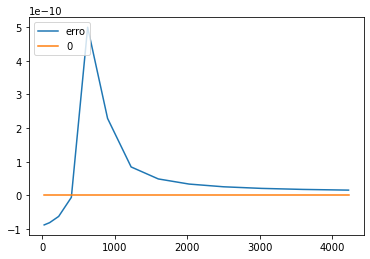

In [24]:
#plot dos erros comparados com o modelo teórico
error = []
for an_tuple in ans:
    (an,n) = an_tuple
    q = ((L/n)**2)*an[len(an)//2:].sum()
    capacitance = abs(q)/V0
    error.append(capacitance-E0*L**2/D)

plt.plot(ns,error, label="erro")
plt.plot(ns,np.zeros(len(ns)), label="0")
plt.legend(loc="upper left")

### Como é possivel observar no gráfico, com o aumento de N o resultado converge para o valor analítico.